<a href="https://colab.research.google.com/github/Vihindi/behavioral_navigation_nlp/blob/master/NLP_LivingRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re #Regex library

def extract_features(text):
    features = {}

    # Basic Information
    # search for patterns in the text
    room_name_match = re.search(r"Room Name: \[([^\]]+)\]", text)
    dimensions_match = re.search(r"Dimensions: \[([^\]]+)\]", text)

    if room_name_match:
        features['Room Name'] = room_name_match.group(1)
    if dimensions_match:
        features['Dimensions'] = dimensions_match.group(1)

    # Furniture and Layout
    """re.findall use to find all occurrences of a pattern related to furniture in the text.
     For each match, it extracts the type and location of the furniture and stores it in the features dictionary"""
    furniture_matches = re.findall(r"The (.+?) is furnished with a (.+?) placed (.+?)\.", text)
    for furniture_match in furniture_matches:
        features[furniture_match[0]] = {'Type': furniture_match[1], 'Location': furniture_match[2]}

    # Accessibility Features
    windows_match = re.search(r"The room has (\d+) windows, providing (natural|artificial) light.", text)
    flooring_match = re.search(r"The flooring is made of \[([^\]]+)\].", text)

    if windows_match:
        features['Number of Windows'] = int(windows_match.group(1))
        features['Light Source'] = windows_match.group(2)
    if flooring_match:
        features['Flooring Material'] = flooring_match.group(1)

    # Technology and Devices
    devices_match = re.findall(r"(\[.+?\]) is located (.+?)\.", text)
    for device_match in devices_match:
        features[device_match[0]] = {'Location': device_match[1]}

    # Other Details
    decorative_elements_match = re.search(r"Decorative elements include \[([^\]]+)\].", text)
    color_scheme_match = re.search(r"The color scheme of the room is \[([^\]]+)\].", text)

    if decorative_elements_match:
        features['Decorative Elements'] = decorative_elements_match.group(1).split(', ')
    if color_scheme_match:
        features['Color Scheme'] = color_scheme_match.group(1).split(', ')

    return features

# Sample input
sample_input = """
Basic Information:
Room Name: [Living Room]
Dimensions: [15 x 20]

Furniture and Layout:
The living room is furnished with a sofa placed against the wall.
There is a coffee table near the window.
A bookshelf is located in the corner.

Accessibility Features:
The room has 2 windows, providing natural light.
The flooring is made of hardwood.

Technology and Devices:
[TV] is located on the media console.
[Sound System] is placed in the entertainment center.

Other Details:
Decorative elements include artwork and plants.
The color scheme of the room is blue and beige.
"""

# Extract features from the sample input
features = extract_features(sample_input)

# Print the extracted features
for key, value in features.items():
    print(f"{key}: {value}")


Room Name: Living Room
Dimensions: 15 x 20
living room: {'Type': 'sofa', 'Location': 'against the wall'}
Number of Windows: 2
Light Source: natural
[TV]: {'Location': 'on the media console'}


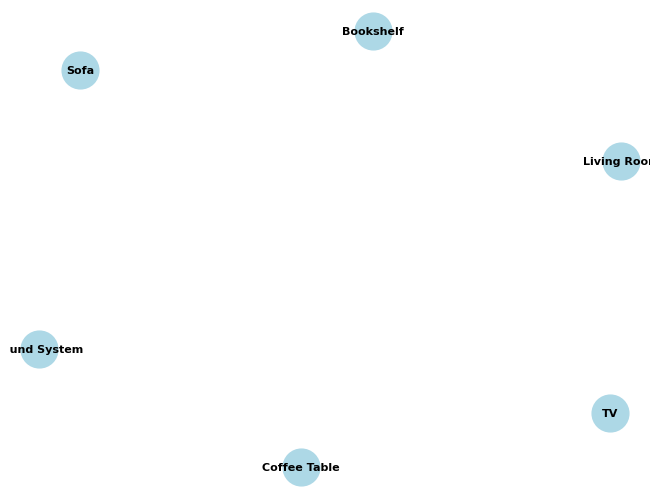

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def create_room_graph(features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Add edges based on spatial relationships
    for key, value in features.items():
        if isinstance(value, dict) and 'Location' in value:
            location = value['Location']
            if location in features:
                G.add_edge(key, location)

    return G

# Sample input (features extracted from the living room scenario)
sample_features = {
    'Living Room': {'Type': 'Room'},
    'Sofa': {'Type': 'Furniture', 'Location': 'Against the wall'},
    'Coffee Table': {'Type': 'Furniture', 'Location': 'Near the window'},
    'Bookshelf': {'Type': 'Furniture', 'Location': 'In the corner'},
    'TV': {'Type': 'Electronic Device', 'Location': 'On the media console'},
    'Sound System': {'Type': 'Electronic Device', 'Location': 'In the entertainment center'},
}

# Create the room graph
room_graph = create_room_graph(sample_features)

# Draw the graph
pos = nx.spring_layout(room_graph)  # Set layout algorithm
nx.draw(room_graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue', font_size=8, font_color='black', edge_color='gray')

# Display the graph
plt.show()


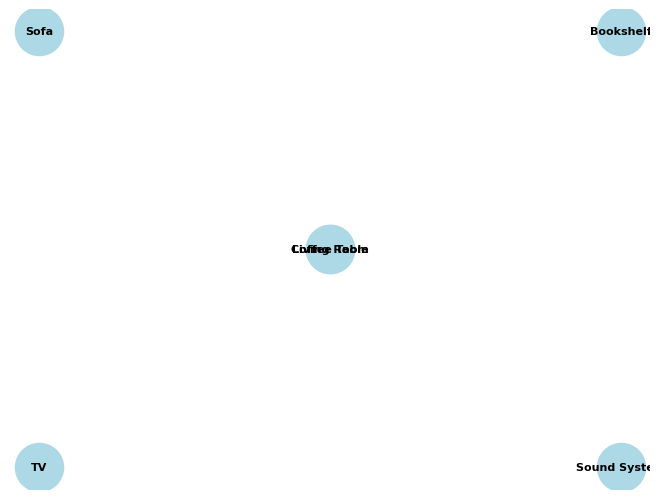

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def create_room_graph(features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Assume connections based on furniture proximity
    for key1, value1 in features.items():
        if isinstance(value1, dict) and 'Location' in value1:
            for key2, value2 in features.items():
                if key1 != key2 and isinstance(value2, dict) and 'Location' in value2:
                    # Connect furniture items located near each other
                    if value1['Location'] == value2['Location']:
                        G.add_edge(key1, key2)

    return G

# Updated sample input with Coffee Table in the middle
sample_features = {
    'Living Room': {'Type': 'Room'},
    'Sofa': {'Type': 'Furniture', 'Location': 'Against the wall'},
    'Coffee Table': {'Type': 'Furniture', 'Location': 'In the middle'},
    'Bookshelf': {'Type': 'Furniture', 'Location': 'In the corner'},
    'TV': {'Type': 'Electronic Device', 'Location': 'On the media console'},
    'Sound System': {'Type': 'Electronic Device', 'Location': 'In the entertainment center'},
}

# Create the room graph with connections based on proximity
room_graph = create_room_graph(sample_features)

# Set the position based on the specified location
pos = {}
for key, value in sample_features.items():
    if isinstance(value, dict) and 'Location' in value:
        location = value['Location']
        if location == 'In the middle':
            pos[key] = (0, 0)
        elif location == 'Against the wall':
            pos[key] = (-1, 1)
        elif location == 'In the corner':
            pos[key] = (1, 1)
        elif location == 'On the media console':
            pos[key] = (-1, -1)
        elif location == 'In the entertainment center':
            pos[key] = (1, -1)

# Add a default position for the 'Living Room'
pos.setdefault('Living Room', (0, 0))

# Draw the graph with red edges, larger node size, and increased figure size
nx.draw(room_graph, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='lightblue', font_size=8, font_color='black', edge_color='red', width=2)

# Display the graph
plt.show()
